In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [277]:
df=pd.read_csv('insurance.csv')

In [278]:
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
1051,64,male,26.41,0,no,northeast,14394.5579
177,54,male,29.20,1,no,southwest,10436.0960
1323,42,female,40.37,2,yes,southeast,43896.3763
1099,25,female,33.99,1,no,southeast,3227.1211
850,37,female,30.78,0,yes,northeast,37270.1512


In [279]:
df.shape

(1338, 7)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [281]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [282]:
for col in df.columns:
  print(col,"value count is:",df[col].nunique())

age value count is: 47
sex value count is: 2
bmi value count is: 548
children value count is: 6
smoker value count is: 2
region value count is: 4
charges value count is: 1337


In [283]:
numerical_features=["age","bmi","children","charges"]
categorical_features=['sex','smoker','region']

In [284]:
df[numerical_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   bmi       1338 non-null   float64
 2   children  1338 non-null   int64  
 3   charges   1338 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 41.9 KB


In [285]:
df[categorical_features]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


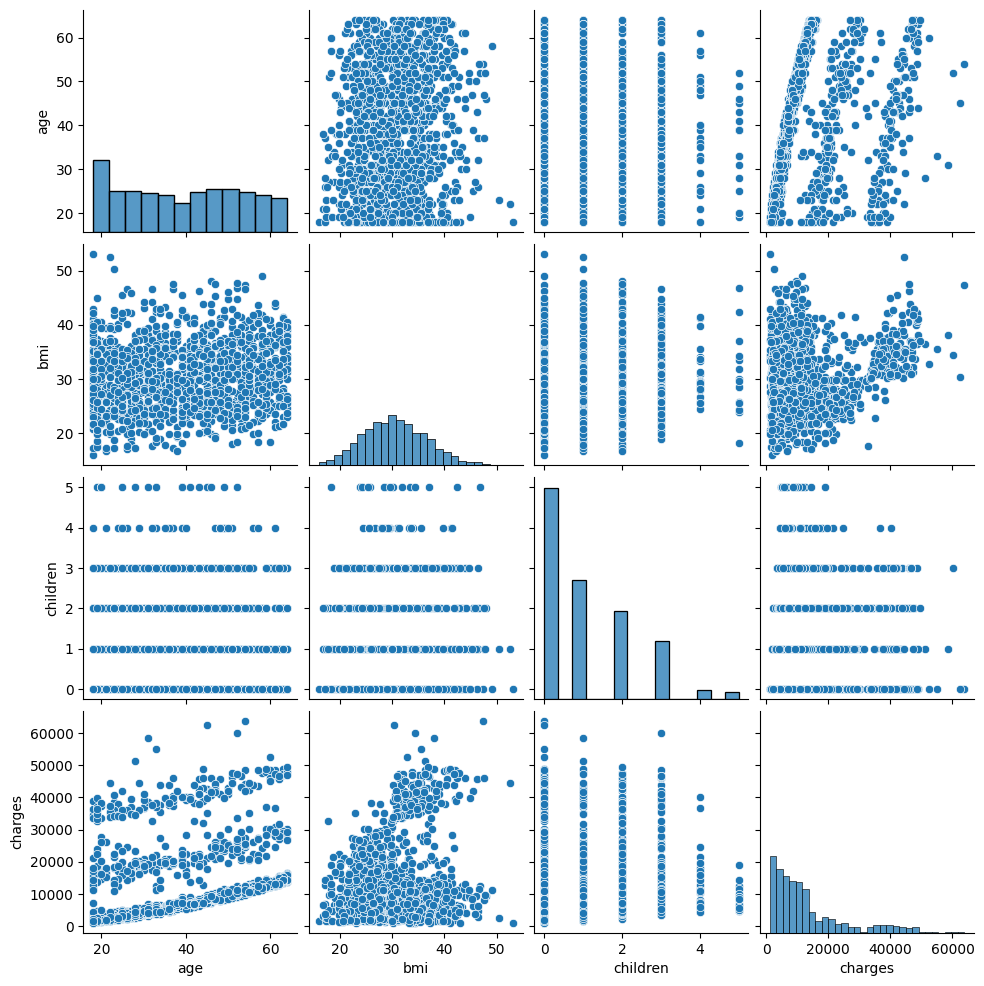

In [286]:
# EDA

sns.pairplot(df)

<Axes: >

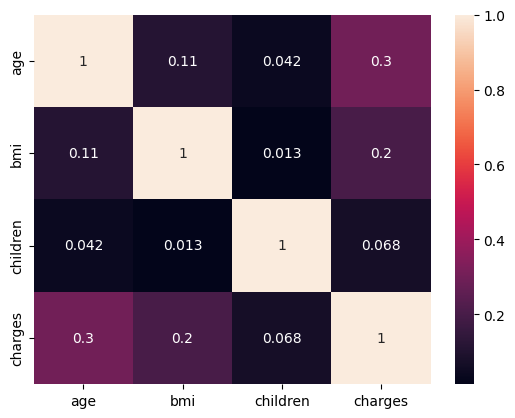

In [287]:
sns.heatmap(df[numerical_features].corr(),annot=True)

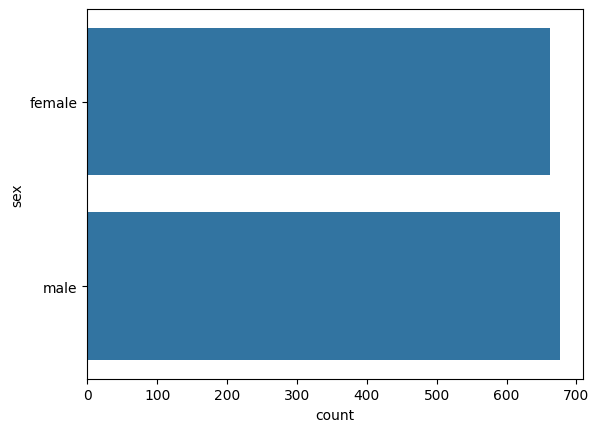

In [288]:
sns.countplot(df['sex'])
plt.show()

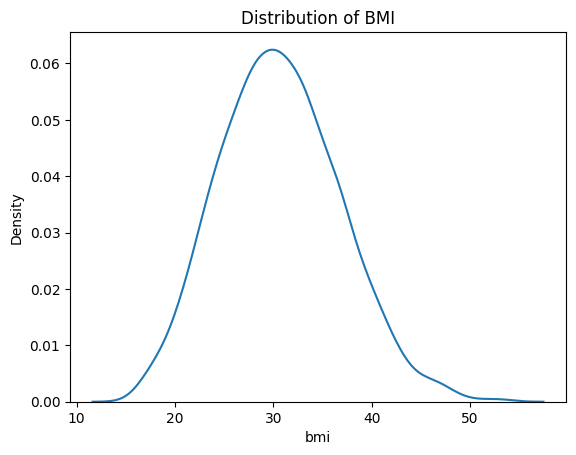

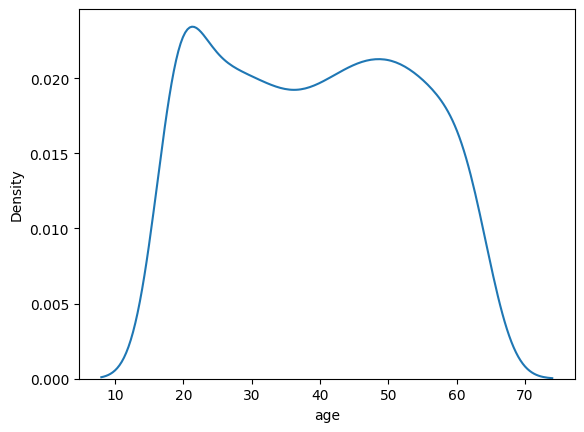

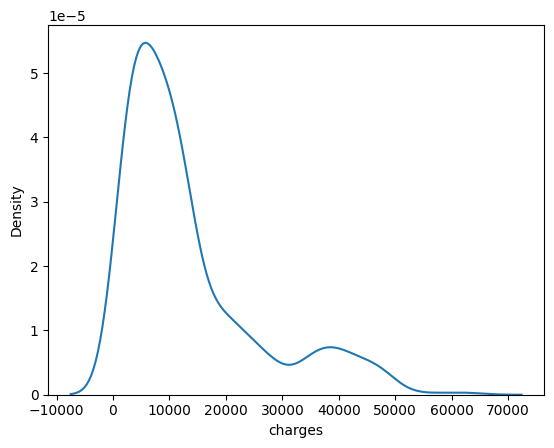

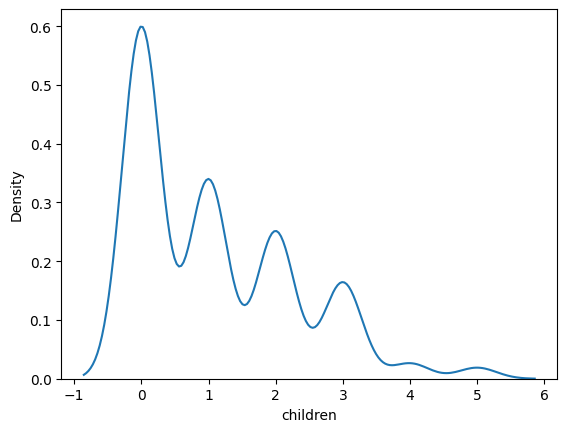

In [289]:
plt.title('Distribution of BMI')
sns.kdeplot(df['bmi'])
plt.show()
sns.kdeplot(df['age'])
plt.show()
sns.kdeplot(df['charges'])
plt.show()
sns.kdeplot(df['children'])
plt.show()

<Axes: xlabel='age', ylabel='charges'>

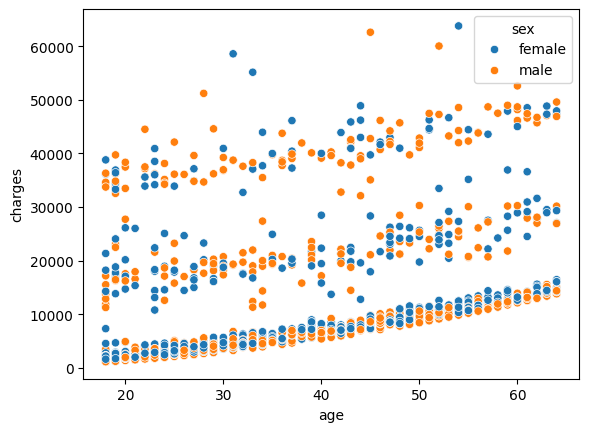

In [290]:
sns.scatterplot(x='age',y='charges',hue='sex',data=df)

In [291]:
ct = pd.crosstab(df['smoker'], df['region'], normalize='index') * 100
print(ct)

region  northeast  northwest  southeast  southwest
smoker                                            
no      24.154135  25.093985  25.657895  25.093985
yes     24.452555  21.167883  33.211679  21.167883


In [292]:
mean_charges = df.groupby('smoker')['charges'].mean()

In [293]:
non_smoker_mean = mean_charges['no']
smoker_mean = mean_charges['yes']

In [294]:
((smoker_mean - non_smoker_mean) / non_smoker_mean) * 100

280.0001458298318

<Axes: xlabel='sex', ylabel='charges'>

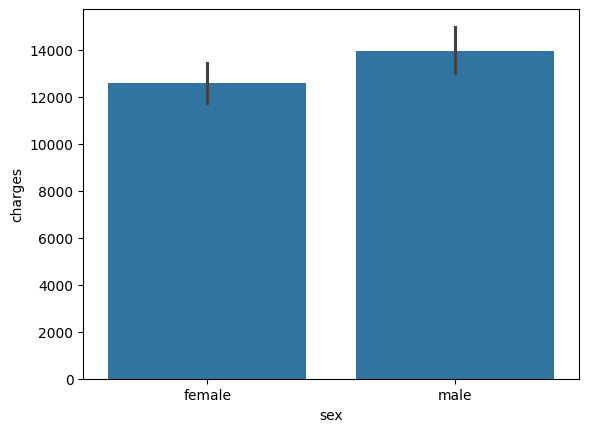

In [295]:
sns.barplot(x='sex',y='charges',data=df)

<Axes: xlabel='region', ylabel='charges'>

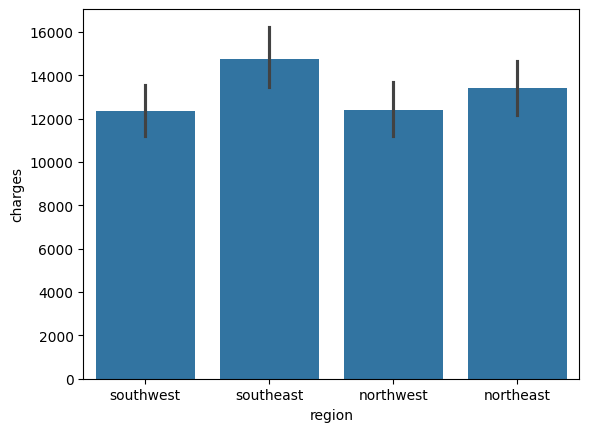

In [296]:
sns.barplot(x='region',y='charges',data=df)

<Axes: xlabel='sex'>

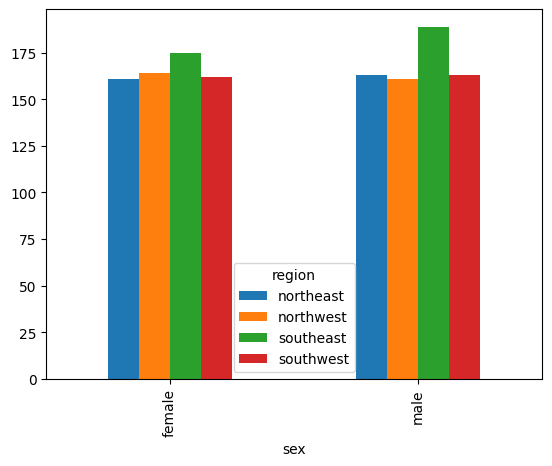

In [297]:
pd.crosstab(df['sex'], df['region']).plot(kind='bar')

In [298]:
# Observaitons


# the categorical colums other than smoker are equally distributed
# the charges ar more for smokers by 2.8 times

<Axes: >

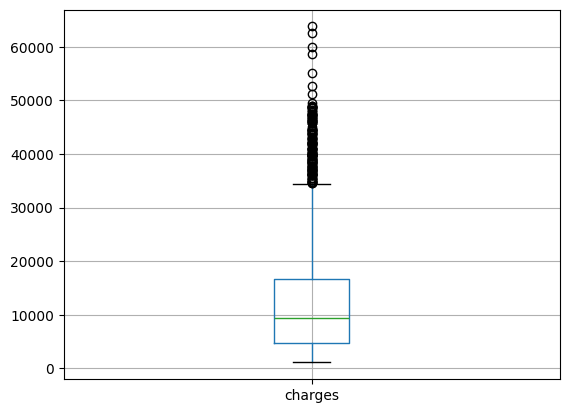

In [299]:
df.boxplot(column=['charges'])

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
x=df.drop('charges',axis=1)
y=df['charges']

In [302]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [303]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [304]:
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse_output=False,drop='first'),['sex','smoker','region']),
    ('tnf2',MinMaxScaler(),['age','bmi','children'])
],remainder='passthrough')

In [305]:
X_train_transformed=transformer.fit_transform(X_train)

In [306]:
pd.DataFrame(X_train_transformed,columns=transformer.get_feature_names_out())

,tnf1__sex_male,tnf1__smoker_yes,tnf1__region_northwest,tnf1__region_southeast,tnf1__region_southwest,tnf2__age,tnf2__bmi,tnf2__children
0,0.0,0.0,1.0,0.0,0.0,0.608696,0.107345,0.4
1,0.0,0.0,0.0,0.0,0.0,0.630435,0.224913,0.0
2,0.0,0.0,0.0,1.0,0.0,0.739130,0.239440,0.0
3,0.0,0.0,0.0,1.0,0.0,0.456522,0.493947,1.0
4,0.0,0.0,1.0,0.0,0.0,0.782609,0.148238,0.6
...,...,...,...,...,...,...,...,...
1065,0.0,0.0,0.0,0.0,0.0,0.000000,0.414044,0.8
1066,0.0,0.0,0.0,1.0,0.0,0.456522,0.212806,1.0
1067,1.0,0.0,0.0,0.0,0.0,0.869565,0.247915,0.0
1068,0.0,1.0,0.0,0.0,1.0,0.413043,0.851224,0.4


### Using Linear Regression

In [307]:
from sklearn.linear_model import LinearRegression

In [308]:
model_lr=LinearRegression()

In [309]:
model_lr.fit(X_train_transformed,y_train)

LinearRegression()

In [310]:
y_pred=model_lr.predict(transformer.transform(X_test))

In [311]:
from sklearn.metrics import r2_score

In [312]:
r2_score(y_test,y_pred)

0.7835929767120723

In [313]:
from sklearn.linear_model import Lasso

In [314]:
model_lasso=Lasso()

In [315]:
model_lasso.fit(X_train_transformed,y_train)

Lasso()

In [316]:
y_pred_lasso=model_lasso.predict(transformer.transform(X_test))

In [317]:
r2_score(y_test,y_pred_lasso)

0.7835213009949491

In [318]:
## Hyper parameter

from sklearn.model_selection import GridSearchCV

In [319]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 50,100],
}

grid_search = GridSearchCV(estimator=model_lasso, param_grid=param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 50, 100]})

In [320]:
grid_search.best_params_

{'alpha': 50}

In [321]:
y_pred_lasso=model_lasso.predict(transformer.transform(X_test))

In [322]:
r2_score(y_test,y_pred_lasso)

0.7835213009949491

Ridge Regression

In [323]:
from sklearn.linear_model import Ridge

In [324]:
model_ridge = Ridge()

In [325]:
model_ridge.fit(X_train_transformed,y_train)

Ridge()

In [326]:
y_pred_ridge=model_ridge.predict(transformer.transform(X_test))

In [327]:
r2_score(y_test,y_pred_ridge)

0.7831720315390667

In [328]:
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1,2, 5,10, 50,100],
}

grid_search = GridSearchCV(estimator=model_ridge, param_grid=param_grid, cv=5)
grid_search.fit(X_train_transformed, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 2, 5, 10, 50, 100]})

In [329]:
grid_search.best_params_

{'alpha': 1}

In [330]:
y_pred_ridge=grid_search.predict(transformer.transform(X_test))

In [331]:
r2_score(y_test,y_pred_ridge)

0.7831720315390667

Random forest

In [332]:
from sklearn.ensemble import RandomForestRegressor

In [333]:
model_rf= RandomForestRegressor()

In [334]:
model_rf.fit(X_train_transformed,y_train)

RandomForestRegressor()

In [335]:
y_pred_rf=model_rf.predict(X_train_transformed)

In [336]:
r2_score(y_train,y_pred_rf)

0.9751291256371799

In [337]:
x_test_transformed = transformer.transform(X_test)

In [338]:
x_train_transformed= transformer.transform(X_train)

Processing Linear Regression...
Processing Decision Tree...
Best parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Processing Random Forest...
Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Processing SVR...
Best parameters for SVR: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Processing Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Processing KNeighbors Regressor...
Best parameters for KNeighbors Regressor: {'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}
Processing AdaBoost Regressor...
Best parameters for AdaBoost Regressor: {'learning_rate': 0.01, 'n_estimators': 50}
Processing ExtraTrees Regressor...
Best parameters for ExtraTrees Regressor: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}


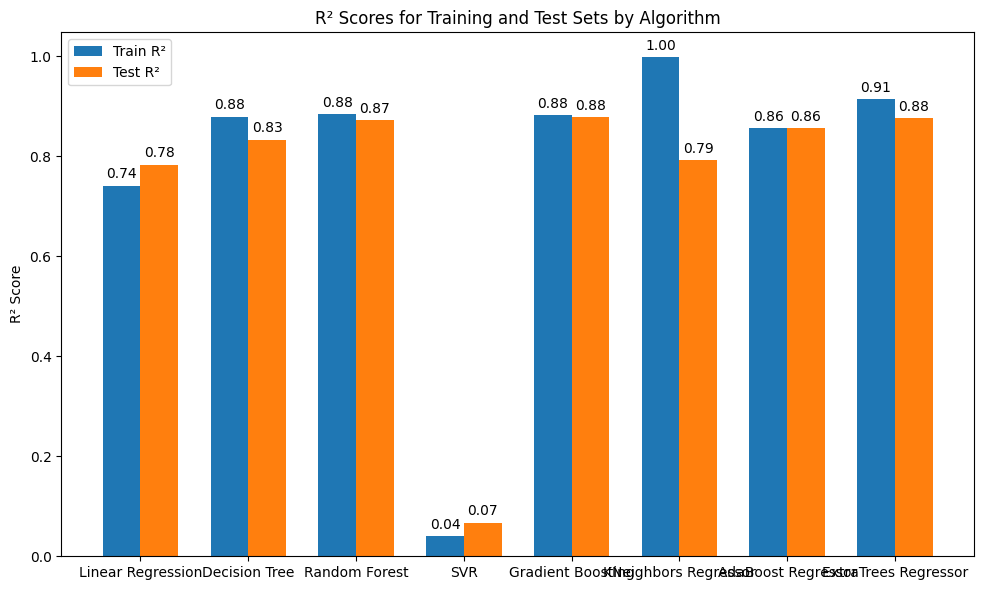

In [339]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'KNeighbors Regressor': KNeighborsRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(random_state=42),
    'ExtraTrees Regressor': ExtraTreesRegressor(random_state=42)
}

param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'SVR': {
        'kernel': ['rbf', 'linear'],
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'KNeighbors Regressor': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    'AdaBoost Regressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'ExtraTrees Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
}

train_scores = {}
test_scores = {}

for name, model in models.items():
    print(f"Processing {name}...")
    param_grid = param_grids[name]

    if param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(x_train_transformed, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        # For models without hyperparameters to tune (e.g., Linear Regression)
        best_model = model
        best_model.fit(x_train_transformed, y_train)

    y_train_pred = best_model.predict(x_train_transformed)
    y_test_pred = best_model.predict(x_test_transformed)

    # Calculating R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores[name] = train_r2
    test_scores[name] = test_r2

algorithms = list(models.keys())
train_r2_values = [train_scores[alg] for alg in algorithms]
test_r2_values = [test_scores[alg] for alg in algorithms]

x = np.arange(len(algorithms))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, train_r2_values, width, label='Train R²')
rects2 = ax.bar(x + width/2, test_r2_values, width, label='Test R²')

ax.set_ylabel('R² Score')
ax.set_title('R² Scores for Training and Test Sets by Algorithm')
ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()



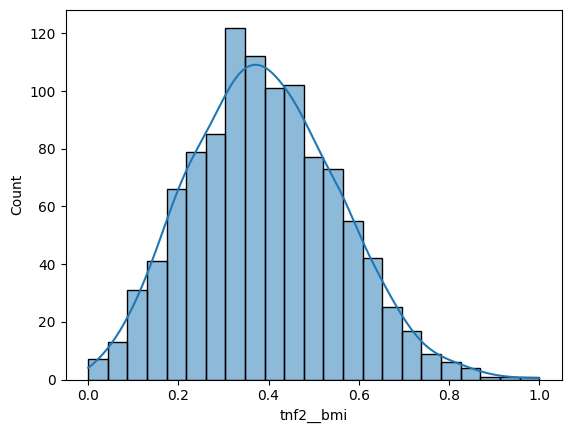

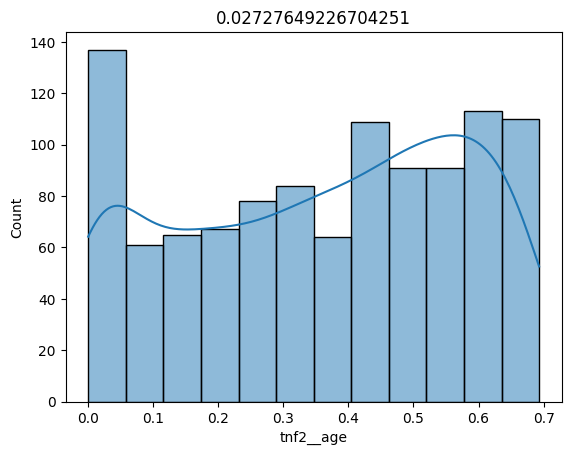

In [340]:
sns.histplot(pd.DataFrame(X_train_transformed,columns=transformer.get_feature_names_out())["tnf2__bmi"],kde=True)
plt.show()
plt.title(pd.DataFrame(X_train_transformed,columns=transformer.get_feature_names_out())["tnf2__age"].skew())
sns.histplot(np.log1p(pd.DataFrame(X_train_transformed,columns=transformer.get_feature_names_out())["tnf2__age"]),kde=True)
plt.show()

In [346]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

model_gb = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(model_gb, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train_transformed, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='r2')

In [348]:
print("Test accuracy : ",r2_score(y_test,grid_search.predict(transformer.transform(X_test))))
print("Train accuracy : ",r2_score(y_train,grid_search.predict(transformer.transform(X_train))))

Test accuracy :  0.8791168856993443
Train accuracy :  0.8833823816627907


Exporting the model

In [349]:
import pickle

In [359]:
with open('trained_model.pkl','wb') as model:
  pickle.dump(grid_search,model)

In [351]:
with open('transformer.pkl','wb') as model:
  pickle.dump(transformer,model)

In [357]:
def predict(age,sex,bmi,children,smoker,region):
  test_df=pd.DataFrame({
      'age':[age],
      'sex':[sex],
      'bmi':[bmi],
      'children':[children],
      'smoker':[smoker],
      'region':[region]
  })

  test_df_transformed=transformer.transform(test_df)
  return grid_search.predict(test_df_transformed)

In [358]:
predict(46,'female',19.950,2,'no','northwest')

array([9395.51377667])